Actividad Guiada 2
Descenso del gradiente

Didier Camilo Olarte Gonzalez

Link GitHub: https://github.com/Did13r/VIU-Algoritmos-de-optimizacion

nota: Intruduje pequenas modificiones al algoritmo para que la 
    tasa de aprendizaje sea proporcional al gradiente y para que 
    el algorimo se detenga automaticamente al alcanzar el minimo.

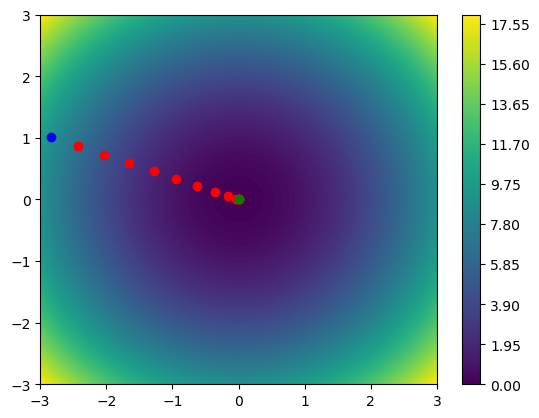

solucion: [-1.0235055202927415e-18, 3.6616674928914165e-19] 1.1816416383546926e-36
iteraciones para alcanzar la solucion:  12


In [44]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

f = lambda X: X[0]**2 + X[1]**2
df = lambda X: [2*X[0], 2*X[1]]

#prepara los datos para graficar mapa de nivel de z

resolucion = 150
rango = 3

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy,ix] = f([x,y])
        
#pinta el mapa de niveles
contour = plt.contourf(X,Y,Z, resolucion)
cbar = plt.colorbar(contour)

#generar punto de aprtida aleatorio
P=[random.uniform(-rango,rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], "o", c="blue")

#inicializacion de la tasa de aprendizaje
TA=0.5

#iteraciones
iteracion = 0
max_iteraciones = 1000
umbral_df = 0.000001  # Umbral para la norma del gradiente

#condicion de parada del algoritmo al alcanzar el umbral
while iteracion < max_iteraciones:
    grad = df(P)
    
    #TA proporcional al gradiente
    TAp = TA / (1 + np.linalg.norm(grad)) 
    P[0], P[1] = P[0] - TAp * grad[0], P[1] - TAp * grad[1]
    plt.plot(P[0], P[1], "o", c="red")
    
    if np.linalg.norm(grad) < umbral_df:
        break
    
    iteracion += 1

plt.plot(P[0], P[1], "o", c="green")
plt.show()
print("solucion:" ,P, f(P))
print(f"iteraciones para alcanzar la solucion: ", iteracion)

# Opcion para mejorar la nota

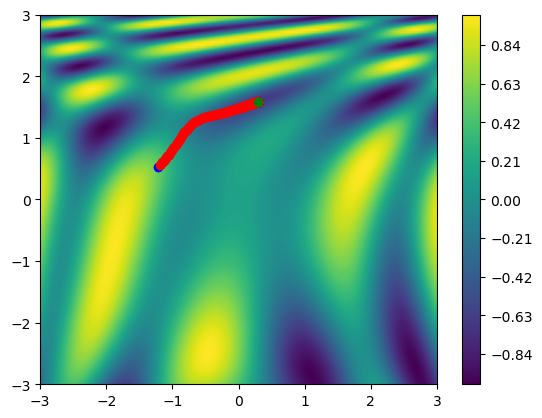

solucion: [0.2902901852396315, 1.588434406804358] -0.6569867163363069
iteraciones para alcanzar la solucion:  306


In [87]:
#definimos la funcion
#sin(1/2*x^2 - 1/4y^2 + 3) * cos(2*x + 1 -E^y)


f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])

def df(PUNTO):
    h = 0.01
    T = np.copy(PUNTO)
    grad = np.zeros(2)
    for it, th in enumerate(PUNTO):
        T[it] = T[it] + h
        grad[it] = (f(T) - f(PUNTO)) / h
    return grad
    
#prepara los datos para graficar mapa de nivel de z

resolucion = 150
rango = 3

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy,ix] = f([x,y])
        
#pinta el mapa de niveles
contour = plt.contourf(X,Y,Z, resolucion)
cbar = plt.colorbar(contour)

#generar punto de aprtida aleatorio
P=[random.uniform(-rango,rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], "o", c="blue")

#inicializacion de la tasa de aprendizaje
TA=0.05

#iteraciones
iteracion = 0
max_iteraciones = 1000
umbral_df = 0.000001  # Umbral para la norma del gradiente

while iteracion < max_iteraciones:
    grad = df(P)
    TAp = TA / (1 + np.linalg.norm(grad))  # TA proporcional al gradiente
    P[0], P[1] = P[0] - TAp * grad[0], P[1] - TAp * grad[1]
    plt.plot(P[0], P[1], "o", c="red")
    
    if np.linalg.norm(grad) < umbral_df:
        break
    
    iteracion += 1

plt.plot(P[0], P[1], "o", c="green")
plt.show()
print("solucion:" ,P, f(P))
print(f"iteraciones para alcanzar la solucion: ", iteracion)